In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 확인

In [2]:
df = pd.read_excel('./data/credit_card_pay.xlsx')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# EDA & 전처리

### 기본 정보 확인

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
df.skew()

ID                             0.000000
LIMIT_BAL                      0.992867
SEX                           -0.424183
EDUCATION                      0.970972
MARRIAGE                      -0.018742
AGE                            0.732246
PAY_0                          0.731975
PAY_2                          0.790565
PAY_3                          0.840682
PAY_4                          0.999629
PAY_5                          1.008197
PAY_6                          0.948029
BILL_AMT1                      2.663861
BILL_AMT2                      2.705221
BILL_AMT3                      3.087830
BILL_AMT4                      2.821965
BILL_AMT5                      2.876380
BILL_AMT6                      2.846645
PAY_AMT1                      14.668364
PAY_AMT2                      30.453817
PAY_AMT3                      17.216635
PAY_AMT4                      12.904985
PAY_AMT5                      11.127417
PAY_AMT6                      10.640727
default payment next month     1.343504


In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
# 라벨 데이터 클래스 불균형 
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [8]:
df['default payment next month'].value_counts()[1] / df['default payment next month'].value_counts().sum() * 100

22.12

In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

c:\Users\baebi\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


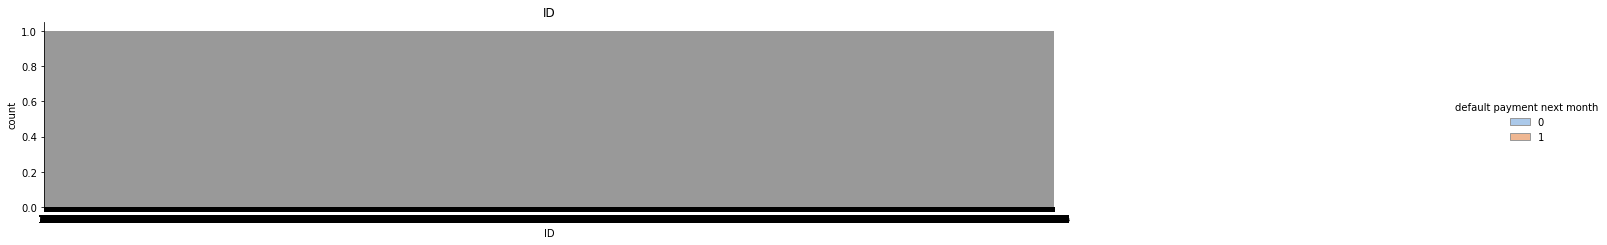

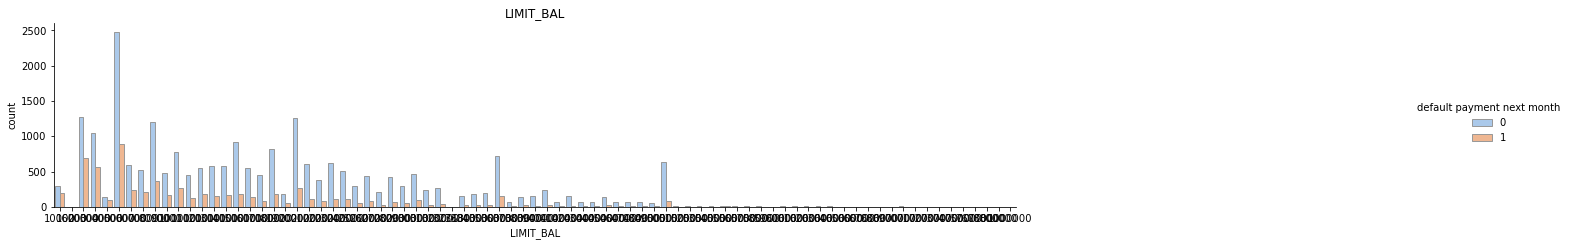

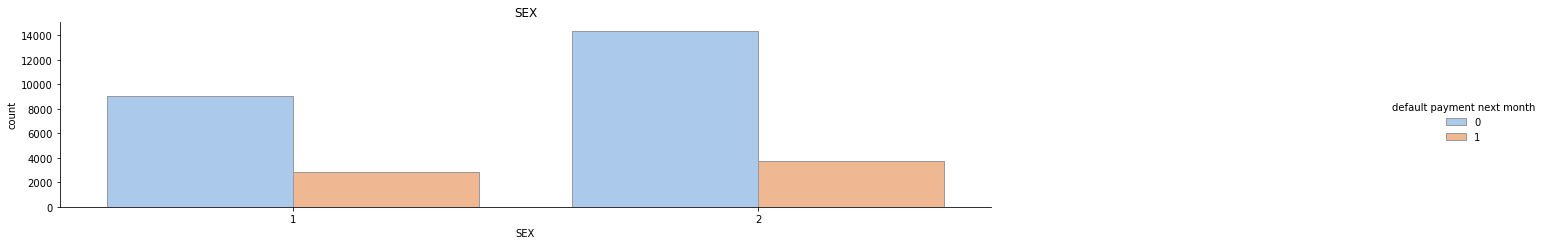

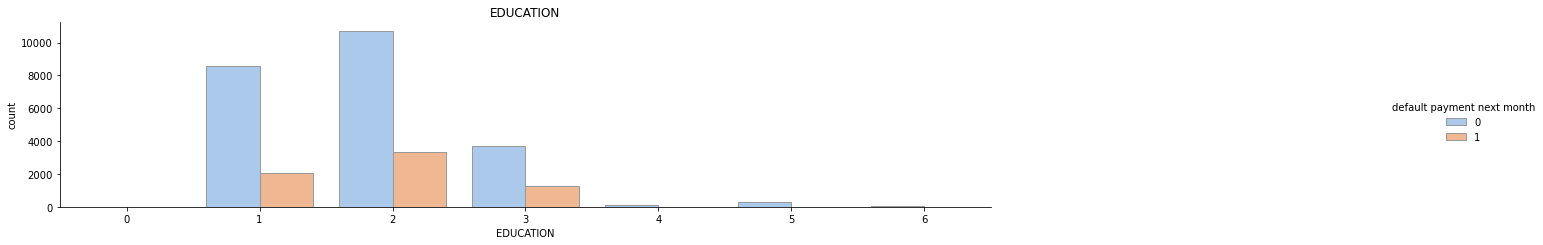

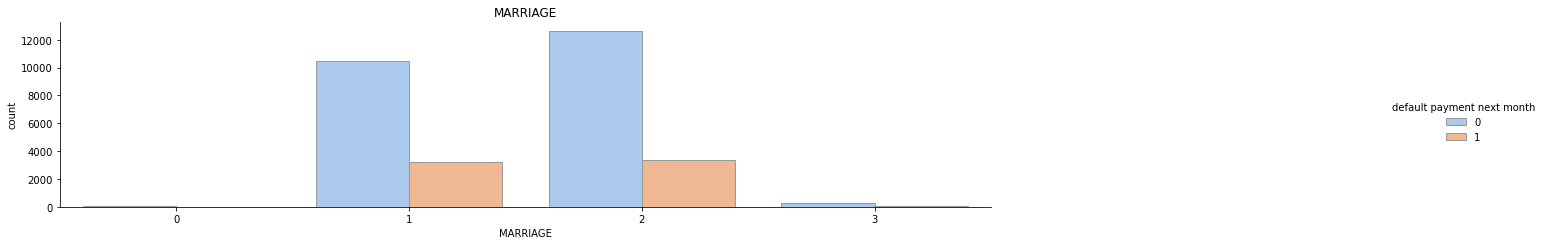

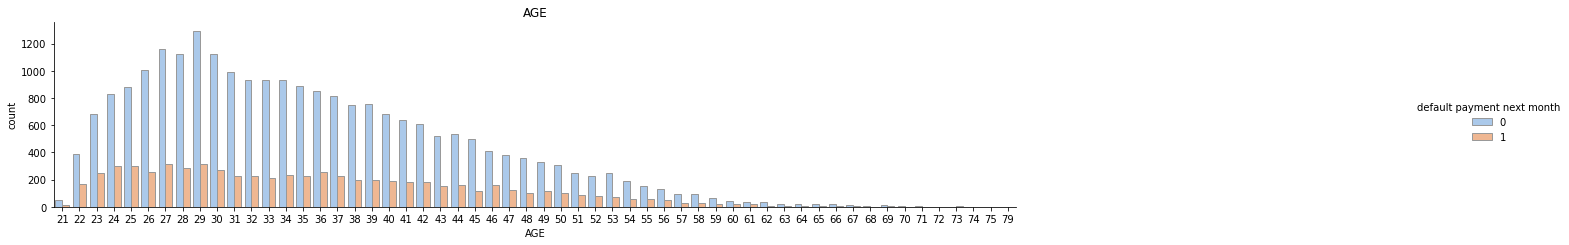

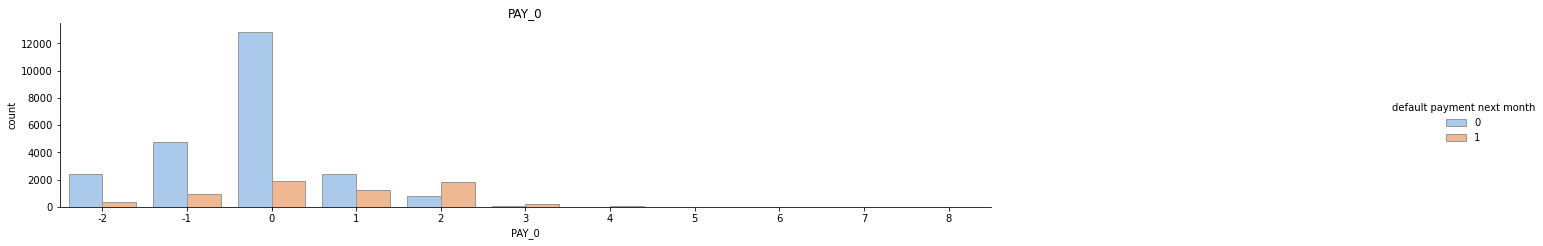

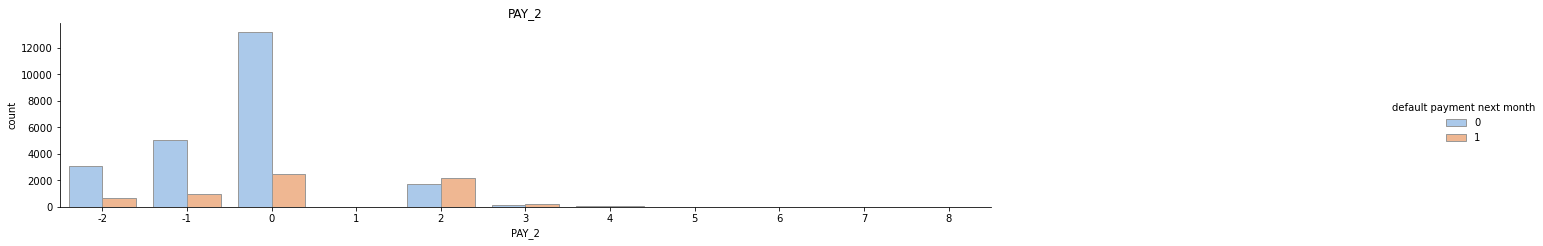

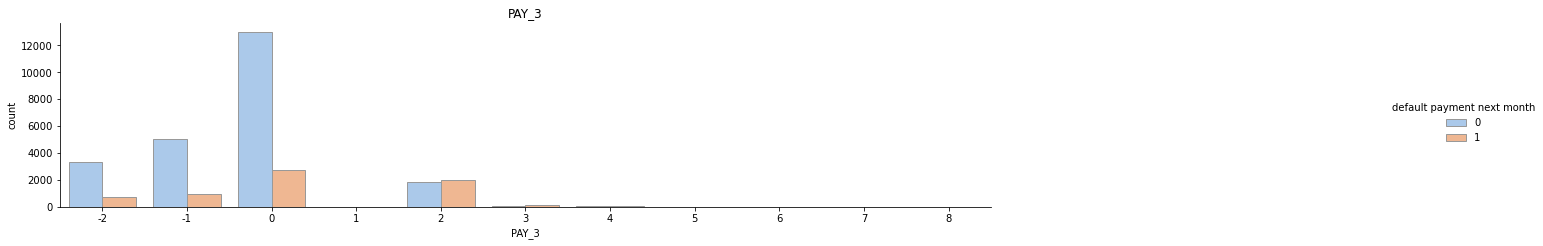

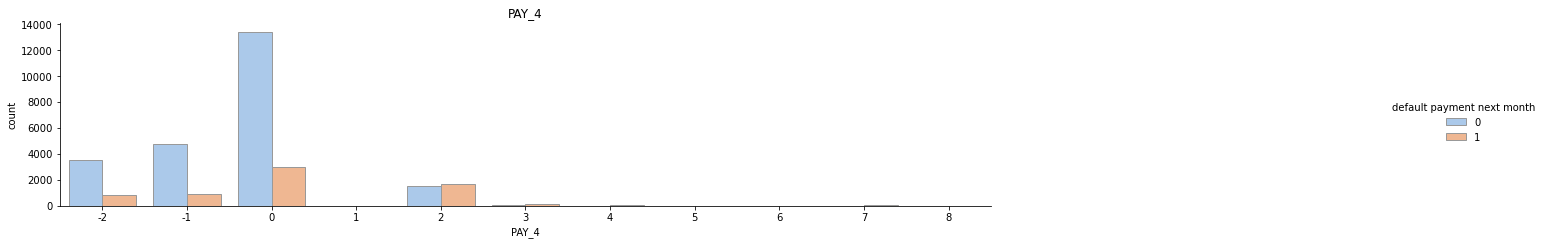

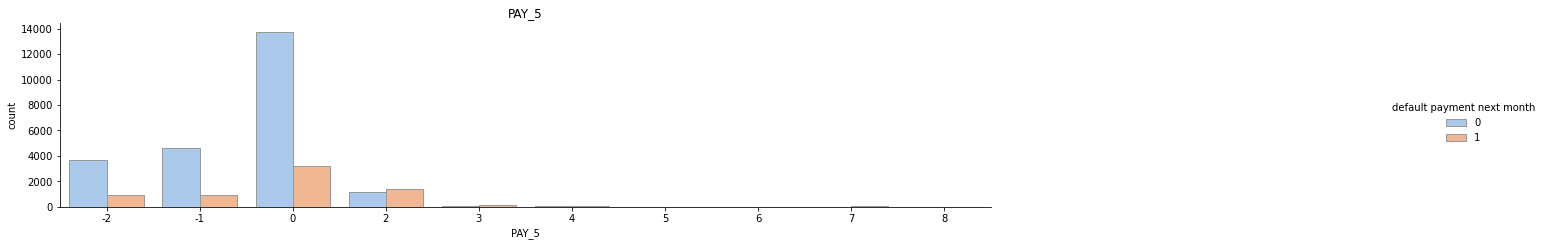

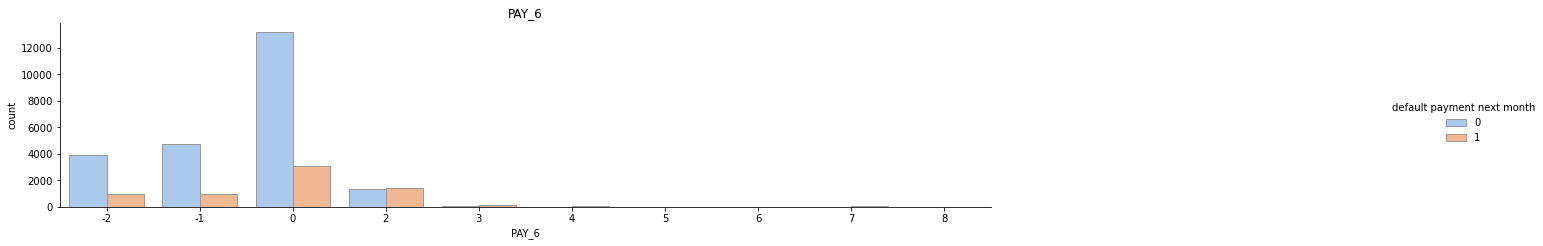

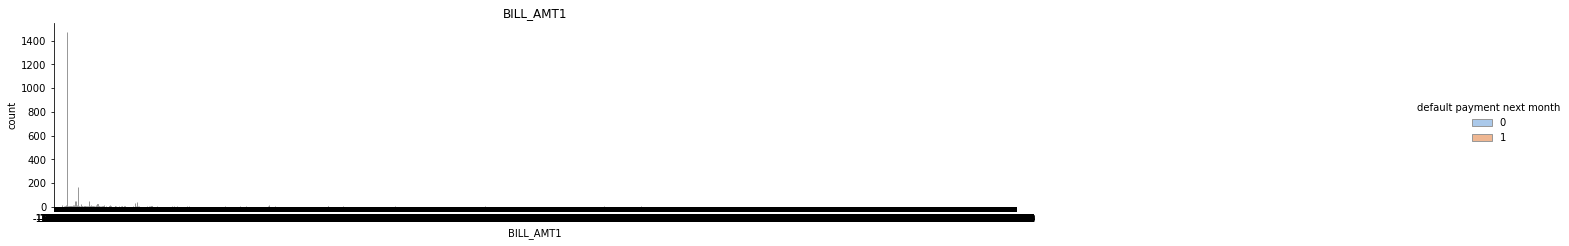

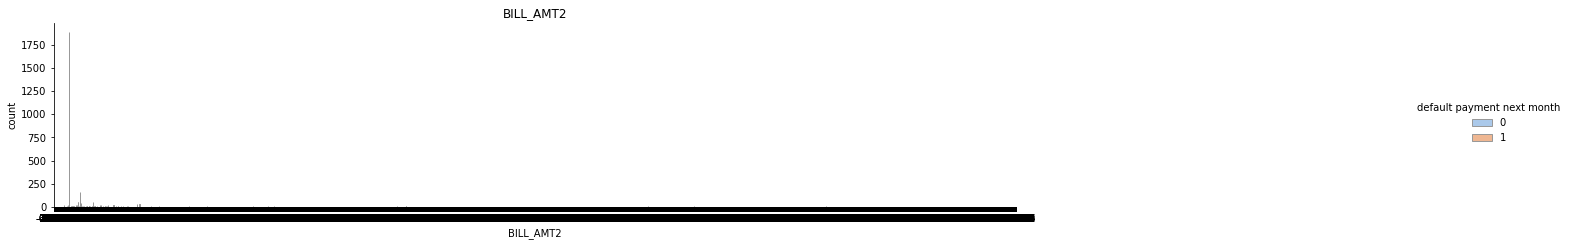

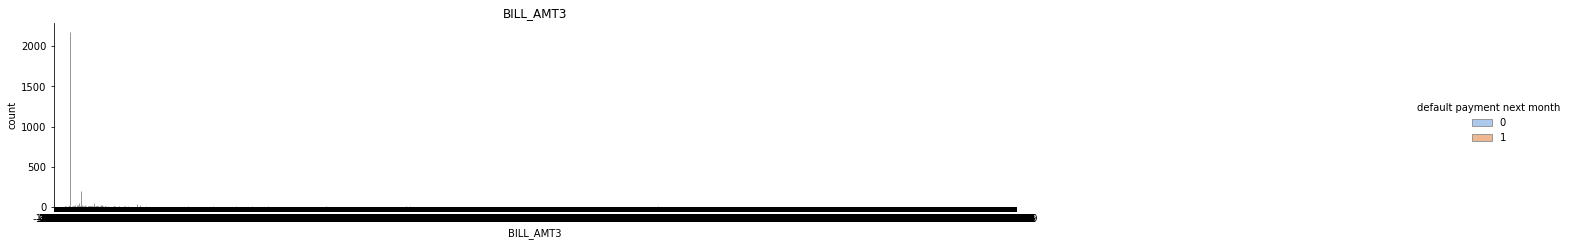

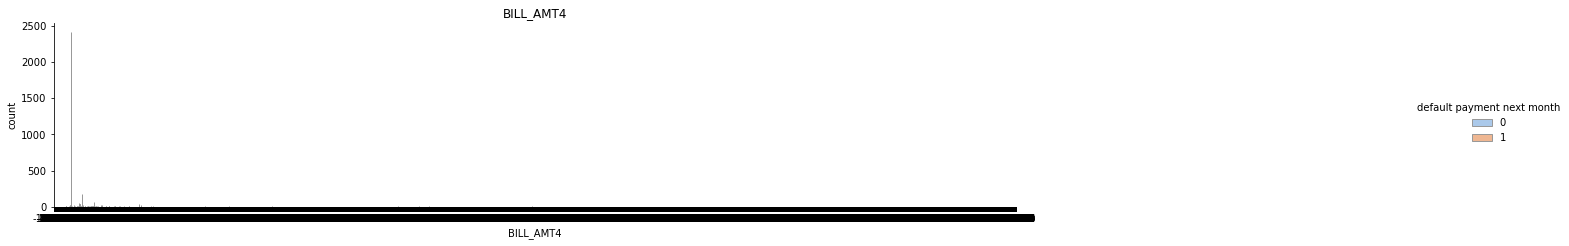

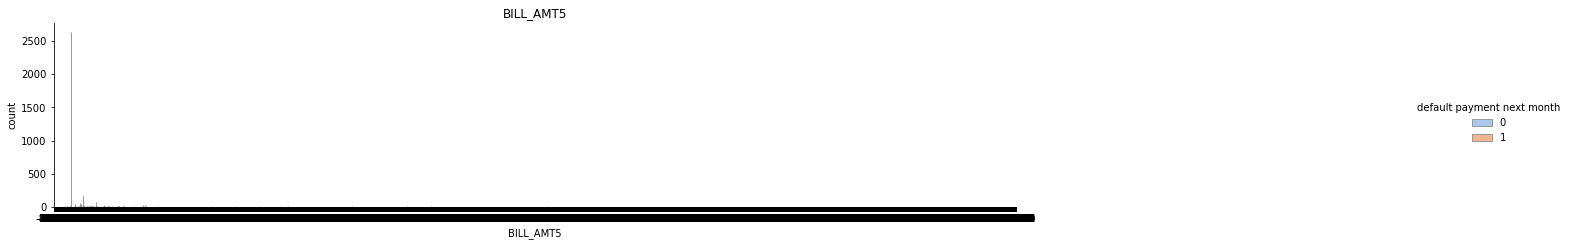

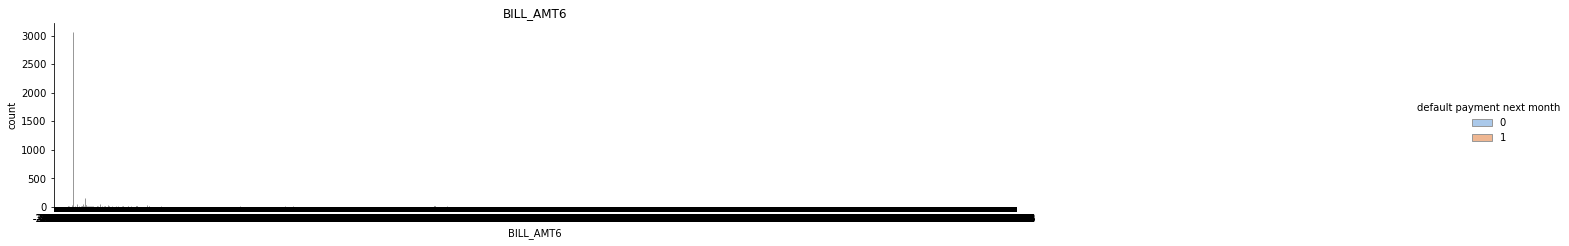

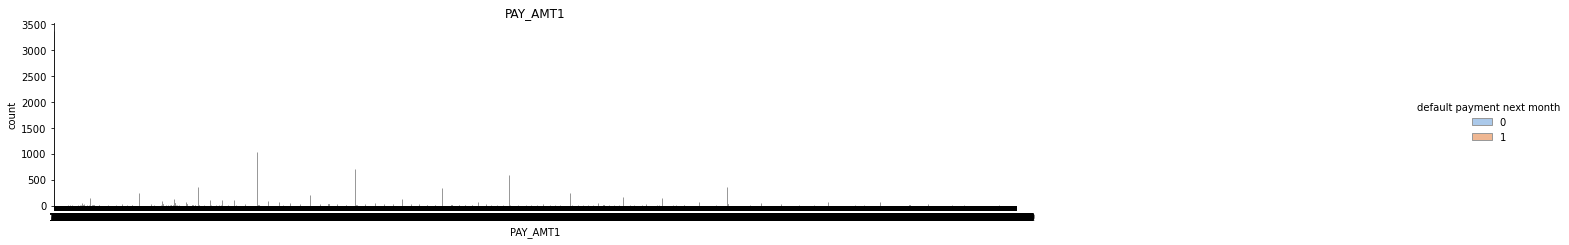

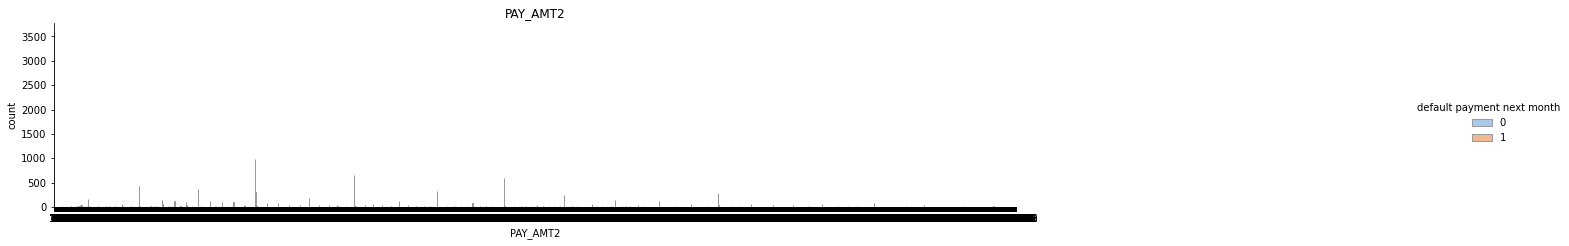

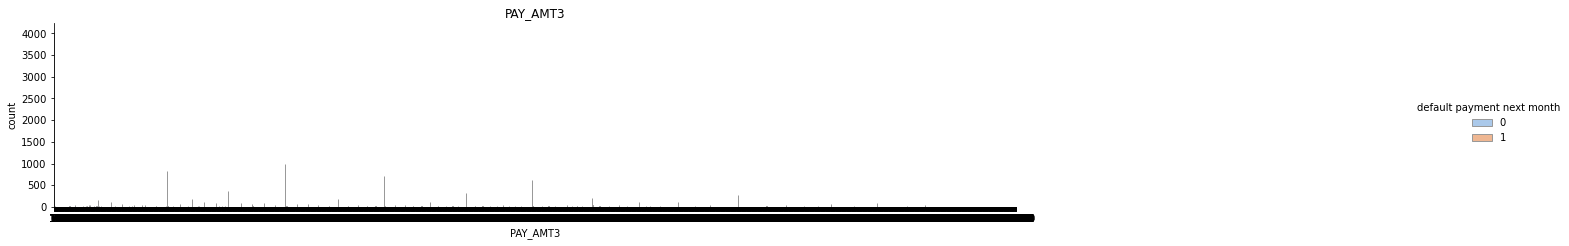

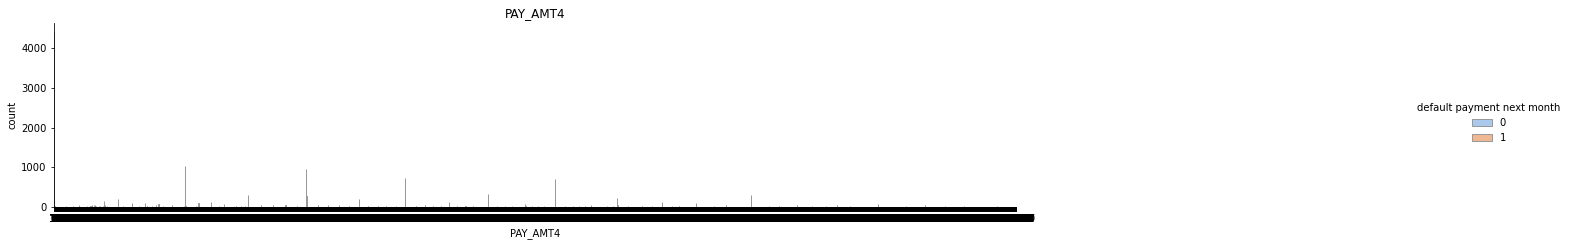

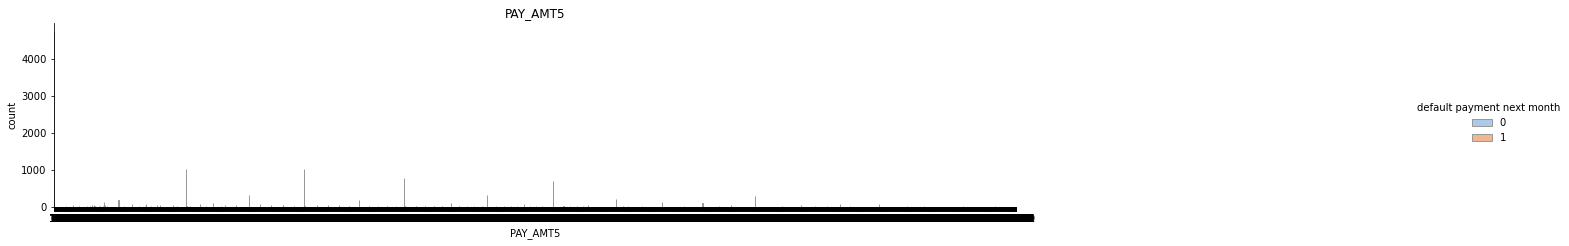

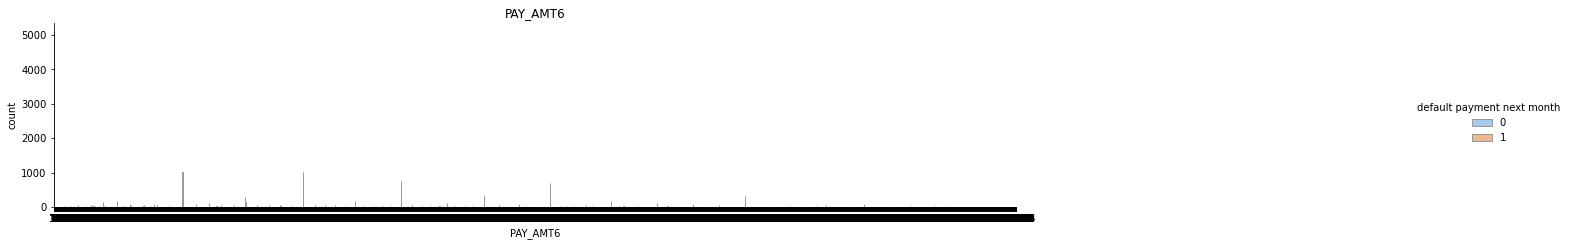

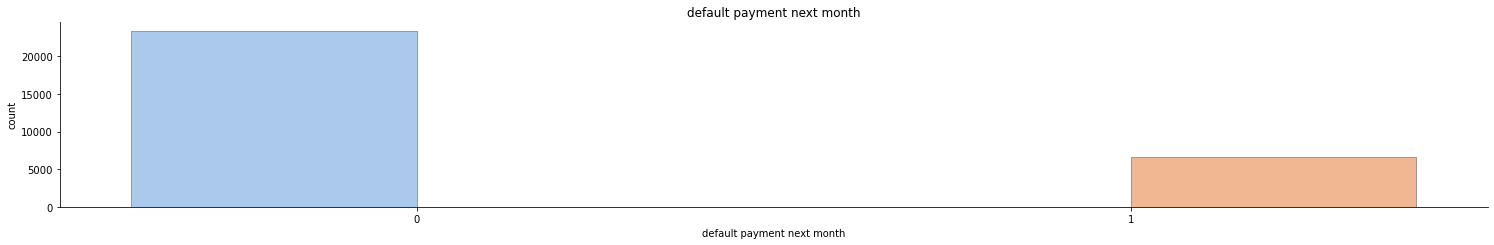

In [16]:
for col in df.columns:
    sns.catplot(x=f"{col}", kind="count",palette="pastel", hue='default payment next month', edgecolor=".6",data=df)
    plt.title(f'{col}')
    plt.gcf().set_size_inches(25, 3)
plt.show()

### EDUCATION 특징 통합
- 0. 4, 5, 6 -> 4

In [10]:
df['EDUCATION'] = np.where((df['EDUCATION']>=4) | (df['EDUCATION']==0) , 4, df['EDUCATION'])

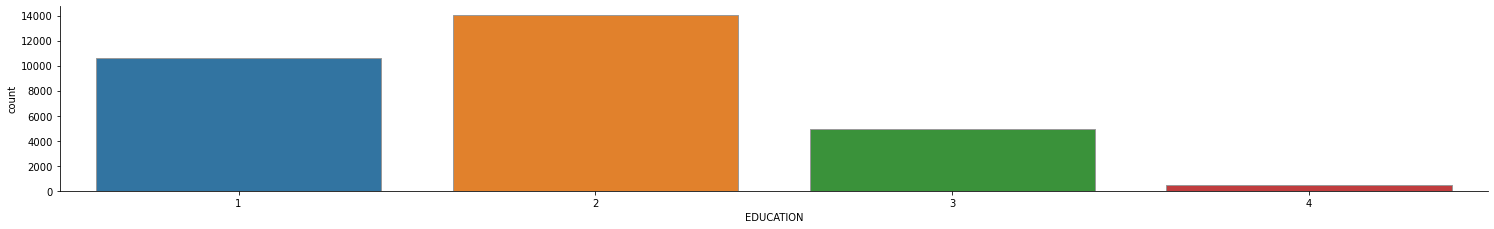

In [11]:
# 교육수준(1-대학원 2-대학 3-고등학교 4-기타)
sns.catplot(x="EDUCATION", kind="count", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.show()

### 청구금액 대비 지불 수준 확인

In [12]:
# 청구 수준 대비 지불 수준 확인
df[['ID', 'BILL_AMT1', 'PAY_AMT1', 'BILL_AMT2', 'PAY_AMT2', 'BILL_AMT3', 'PAY_AMT3', 'BILL_AMT4', 'PAY_AMT4', 'BILL_AMT5', 'PAY_AMT5', 'BILL_AMT6', 'PAY_AMT6']]

,ID,BILL_AMT1,PAY_AMT1,BILL_AMT2,PAY_AMT2,BILL_AMT3,PAY_AMT3,BILL_AMT4,PAY_AMT4,BILL_AMT5,PAY_AMT5,BILL_AMT6,PAY_AMT6
0,1,3913,0,3102,689,689,0,0,0,0,0,0,0
1,2,2682,0,1725,1000,2682,1000,3272,1000,3455,0,3261,2000
2,3,29239,1518,14027,1500,13559,1000,14331,1000,14948,1000,15549,5000
3,4,46990,2000,48233,2019,49291,1200,28314,1100,28959,1069,29547,1000
4,5,8617,2000,5670,36681,35835,10000,20940,9000,19146,689,19131,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,188948,8500,192815,20000,208365,5003,88004,3047,31237,5000,15980,1000
29996,29997,1683,1837,1828,3526,3502,8998,8979,129,5190,0,0,0
29997,29998,3565,0,3356,0,2758,22000,20878,4200,20582,2000,19357,3100
29998,29999,-1645,85900,78379,3409,76304,1178,52774,1926,11855,52964,48944,1804


In [13]:
# 과거 6개월 동안 총 청구 대비 지불 수준을 확인하기 위해 새로운 col 생성 
df['PAY/BILL'] = round(((df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']) 
                  / (df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6'])) * 100, 1)

In [14]:
df['PAY/BILL'].sort_values()

3052    -54692.9
18876   -54108.5
10862   -37550.0
5002    -24944.7
28193   -16179.7
          ...   
29908        NaN
29909        NaN
29973        NaN
29979        NaN
29985        NaN
Name: PAY/BILL, Length: 30000, dtype: float64

In [15]:
df['PAY/BILL'].unique()

array([  8.9,  29.3,  10.8, ..., 642. , 136.4, 144.5])

In [16]:
# 총 청구 대금이 0인 고객이 존재할 경우, inf로 표현되기 때문에 전처리를 통해 제거
# NA인 경우에는 0으로 채움
df['PAY/BILL'] = df['PAY/BILL'].fillna(0)

In [17]:
df['PAY/BILL'].sort_values()

3052    -54692.9
18876   -54108.5
10862   -37550.0
5002    -24944.7
28193   -16179.7
          ...   
9405         inf
27725        inf
2742         inf
10737        inf
3141         inf
Name: PAY/BILL, Length: 30000, dtype: float64

In [18]:
# 총 청구 대금이 0인 고객이 존재할 경우, inf로 표현되기 때문에 전처리를 통해 제거
df['PAY/BILL'] = df['PAY/BILL'].replace([np.inf, -np.inf], np.nan)
df['PAY/BILL'] = df['PAY/BILL'].fillna(0)

In [19]:
df['PAY/BILL'].sort_values()

3052    -54692.9
18876   -54108.5
10862   -37550.0
5002    -24944.7
28193   -16179.7
          ...   
19451     8316.3
28122    12146.0
3797     20538.0
24273    39015.9
7475     79700.0
Name: PAY/BILL, Length: 30000, dtype: float64

In [20]:
# 이상 Data 처리
df['PAY/BILL'] = np.where(df['PAY/BILL']>100, 100, df['PAY/BILL'])
df['PAY/BILL'] = np.where(df['PAY/BILL']<0, 0, df['PAY/BILL'])

In [21]:
df['PAY/BILL'].sort_values()

17394      0.0
10396      0.0
13556      0.0
21957      0.0
13558      0.0
         ...  
17809    100.0
26750    100.0
17807    100.0
20323    100.0
15278    100.0
Name: PAY/BILL, Length: 30000, dtype: float64

c:\Users\baebi\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


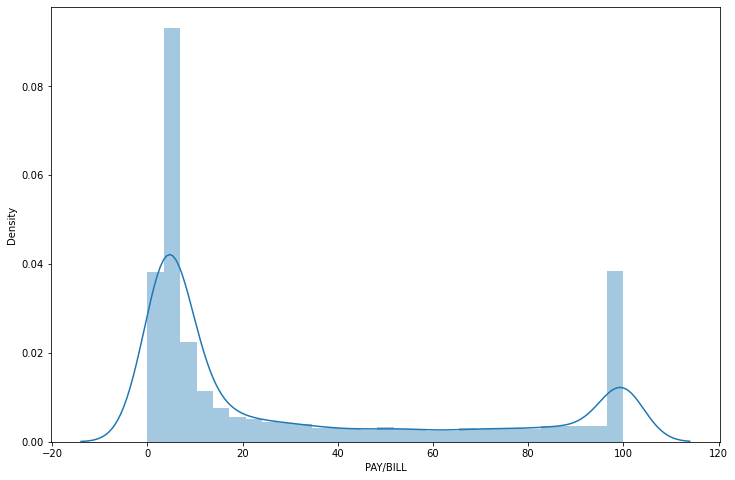

In [22]:
# 대부분의 고객이 총 청구금액 대비 20% 수준에서만 지불을 하고 있음
sns.distplot(df['PAY/BILL'])
plt.gcf().set_size_inches(12, 8)
plt.show()

### 범주형 컬럼별 채무 비율 확인

In [23]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'PAY/BILL'],
      dtype='object')

In [24]:
def get_ratio(col_idx):
    #  확인하려는 컬럼 groupby
    df_profile=pd.DataFrame(df['default payment next month'].groupby(df[col_idx]).value_counts())
    df_profile.columns=['cnt']
    df_profile=df_profile.reset_index()

    #  pivot_table 적용
    df_profile = pd.pivot_table(df_profile,                        # 피벗할 데이터프레임
                        index = col_idx,                           # 행 위치에 들어갈 열
                        columns = 'default payment next month',    # 열 위치에 들어갈 열
                        values = 'cnt')                            # 데이터로 사용할 열 

    #  reset index
    df_profile = df_profile.reset_index()
    df_profile.columns.names=['']


    #  채무 비율 확인
    df_profile['sign_ratio'] =   round((df_profile.iloc[:,2] / (df_profile.iloc[:,1] + df_profile.iloc[:,2])) * 100,1)
    df_profile=df_profile.sort_values(by=['sign_ratio'], ascending=False)
    df_profile

    return df_profile

In [25]:
get_ratio('EDUCATION')

,EDUCATION,0,1,sign_ratio
2,3,3680,1237,25.2
1,2,10700,3330,23.7
0,1,8549,2036,19.2
3,4,435,33,7.1


In [26]:
get_ratio('SEX')

,SEX,0,1,sign_ratio
0,1,9015,2873,24.2
1,2,14349,3763,20.8


In [27]:
get_ratio('MARRIAGE')

,MARRIAGE,0,1,sign_ratio
3,3,239,84,26.0
1,1,10453,3206,23.5
2,2,12623,3341,20.9
0,0,49,5,9.3


- LIMIT_BAL은 그룹을 나눠서 보자.

In [28]:
get_ratio('LIMIT_BAL')

,LIMIT_BAL,0,1,sign_ratio
75,740000,1.0,1.0,50.0
4,40000,138.0,92.0,40.0
0,10000,296.0,197.0,40.0
3,30000,1042.0,568.0,35.3
2,20000,1278.0,698.0,35.3
...,...,...,...,...
76,750000,4.0,NaN,NaN
77,760000,1.0,NaN,NaN
78,780000,2.0,NaN,NaN
79,800000,2.0,NaN,NaN


In [29]:
df['LIMIT_BAL'].sort_values().unique()

array([  10000,   16000,   20000,   30000,   40000,   50000,   60000,
         70000,   80000,   90000,  100000,  110000,  120000,  130000,
        140000,  150000,  160000,  170000,  180000,  190000,  200000,
        210000,  220000,  230000,  240000,  250000,  260000,  270000,
        280000,  290000,  300000,  310000,  320000,  327680,  330000,
        340000,  350000,  360000,  370000,  380000,  390000,  400000,
        410000,  420000,  430000,  440000,  450000,  460000,  470000,
        480000,  490000,  500000,  510000,  520000,  530000,  540000,
        550000,  560000,  570000,  580000,  590000,  600000,  610000,
        620000,  630000,  640000,  650000,  660000,  670000,  680000,
        690000,  700000,  710000,  720000,  730000,  740000,  750000,
        760000,  780000,  800000, 1000000], dtype=int64)

c:\Users\baebi\miniconda3\envs\ds_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


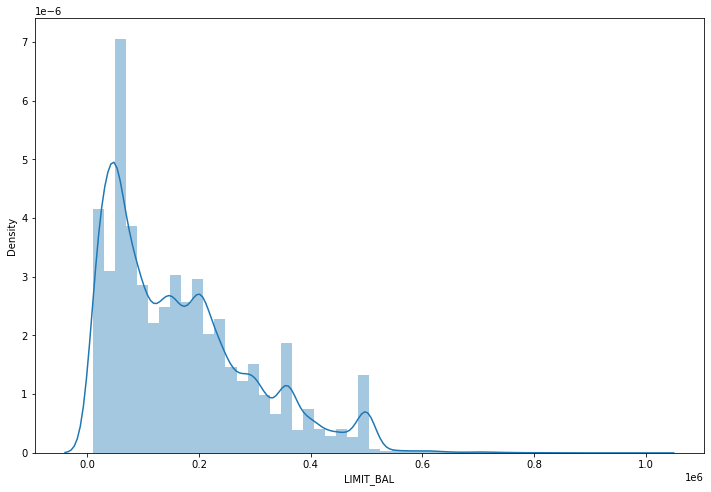

In [30]:
sns.distplot(df['LIMIT_BAL'])
plt.gcf().set_size_inches(12, 8)
plt.show()

In [31]:
np.quantile(df['LIMIT_BAL'].sort_values(), 0.99)

500000.0

In [32]:
np.quantile(df['LIMIT_BAL'].sort_values(), 0.75)

240000.0

In [33]:
# Numeric(연속형) 변수의 구간화 작업
# 100,000 이하, 100,000 초과 300,000 이하, 300,000 초과 500,000 이하, 500,000 초과(4 Group)


df['LIMIT_GP'] = np.where (df['LIMIT_BAL'] <= 100000, 1, 
                           np.where(df['LIMIT_BAL'] <= 300000, 2,
                           np.where(df['LIMIT_BAL'] <= 500000, 3, 4)))

df[['ID', 'LIMIT_BAL', 'LIMIT_GP']]

,ID,LIMIT_BAL,LIMIT_GP
0,1,20000,1
1,2,120000,2
2,3,90000,1
3,4,50000,1
4,5,50000,1
...,...,...,...
29995,29996,220000,2
29996,29997,150000,2
29997,29998,30000,1
29998,29999,80000,1


In [34]:
df['LIMIT_GP'].value_counts()

2    12939
1    12498
3     4357
4      206
Name: LIMIT_GP, dtype: int64

In [35]:
get_ratio('LIMIT_GP')

,LIMIT_GP,0,1,sign_ratio
0,1,8814,3684,29.5
1,2,10592,2347,18.1
2,3,3775,582,13.4
3,4,183,23,11.2


# modeling


In [41]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import classification_report, roc_auc_score

In [42]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PAY/BILL,LIMIT_GP
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,8.9,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,29.3,2
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,10.8,1
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,3.6,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,54.0,1


- 데이터 분리

In [49]:
X = df.drop(['ID', 'default payment next month'], axis=1)
Y = df[['default payment next month']]

In [51]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, stratify=Y)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((22500, 25), (22500, 1), (7500, 25), (7500, 1))

- 하이퍼 파라미터

In [43]:
param_grid = ParameterGrid({
                                'max_depth':[3, 5, 10, 15, 30, 50, 100],
                                'n_estimators':[100, 200, 400, 600, 800],
                                'random_state':[29, 1000],
                                'n_jobs':[-1]
})

In [47]:
max_iter = 0

for p in param_grid:
    max_iter += 1

print(max_iter)

70


- 모델 선택

In [64]:
best_score = -1
iter_num = 0

for p in param_grid:
    model = RFC(**p).fit(train_x, train_y)
    pred = model.predict_proba(test_x)[:, 1]
    score = roc_auc_score(test_y, pred)

    if best_score < score:
        best_score = score
        best_param = p
    
    iter_num += 1

    print(f'{iter_num}/{max_iter} : best score : {best_score} | score : {score}')

C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


1/70 : best score : 0.7680871299193548 | score : 0.7680871299193548


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


2/70 : best score : 0.7693495884871127 | score : 0.7693495884871127


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


3/70 : best score : 0.7695730612486673 | score : 0.7695730612486673


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


4/70 : best score : 0.7696753809176036 | score : 0.7696753809176036


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


5/70 : best score : 0.7699054066786313 | score : 0.7699054066786313


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


6/70 : best score : 0.7701516343438678 | score : 0.7701516343438678


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


7/70 : best score : 0.7701516343438678 | score : 0.7696929759791806


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


8/70 : best score : 0.7701516343438678 | score : 0.7701067953159778


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


9/70 : best score : 0.7701516343438678 | score : 0.769663822871289


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


10/70 : best score : 0.7702594750438561 | score : 0.7702594750438561


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


11/70 : best score : 0.7735882955792845 | score : 0.7735882955792845


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


12/70 : best score : 0.7735882955792845 | score : 0.7734890202171901


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


13/70 : best score : 0.7738609932345183 | score : 0.7738609932345183


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


14/70 : best score : 0.7738609932345183 | score : 0.7735750863834967


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


15/70 : best score : 0.7746183032602257 | score : 0.7746183032602257


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


16/70 : best score : 0.7746183032602257 | score : 0.7738850380987262


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


17/70 : best score : 0.7746183032602257 | score : 0.7745967351202279


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


18/70 : best score : 0.7746183032602257 | score : 0.7743413745344662


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


19/70 : best score : 0.7746183032602257 | score : 0.7744052533797224


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


20/70 : best score : 0.7746183032602257 | score : 0.7745269224565514


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


21/70 : best score : 0.7783551125108731 | score : 0.7783551125108731


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


22/70 : best score : 0.7815645342999988 | score : 0.7815645342999988


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


23/70 : best score : 0.7815645342999988 | score : 0.7798496091780794


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


24/70 : best score : 0.7815645342999988 | score : 0.7814821316215868


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


25/70 : best score : 0.7815645342999988 | score : 0.7802365457375112


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


26/70 : best score : 0.7815703649215772 | score : 0.7815703649215772


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


27/70 : best score : 0.7815703649215772 | score : 0.7802268968327754


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


28/70 : best score : 0.7815703649215772 | score : 0.7812883279521341


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


29/70 : best score : 0.7815703649215772 | score : 0.7803904638274946


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


30/70 : best score : 0.7815703649215772 | score : 0.7813537031516007


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


31/70 : best score : 0.7815703649215772 | score : 0.7740363762676571


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


32/70 : best score : 0.7815703649215772 | score : 0.7766061840294838


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


33/70 : best score : 0.7815703649215772 | score : 0.777086926518379


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


34/70 : best score : 0.7815703649215772 | score : 0.7781095040266891


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


35/70 : best score : 0.7815703649215772 | score : 0.7784977305466471


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


36/70 : best score : 0.7815703649215772 | score : 0.7785762633434807


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


37/70 : best score : 0.7815703649215772 | score : 0.7794109194023375


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


38/70 : best score : 0.7815703649215772 | score : 0.7787984461445093


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


39/70 : best score : 0.7815703649215772 | score : 0.778914336198181


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


40/70 : best score : 0.7815703649215772 | score : 0.7790978201834242


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


41/70 : best score : 0.7815703649215772 | score : 0.7628417376325551


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


42/70 : best score : 0.7815703649215772 | score : 0.7651413760617795


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


43/70 : best score : 0.7815703649215772 | score : 0.7680922897614595


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


44/70 : best score : 0.7815703649215772 | score : 0.7673616561194334


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


45/70 : best score : 0.7815703649215772 | score : 0.7692561953450175


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


46/70 : best score : 0.7815703649215772 | score : 0.7687215325061281


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


47/70 : best score : 0.7815703649215772 | score : 0.7688871118392681


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


48/70 : best score : 0.7815703649215772 | score : 0.7686413485598209


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


49/70 : best score : 0.7815703649215772 | score : 0.7695557241791956


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


50/70 : best score : 0.7815703649215772 | score : 0.7693858105786876


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


51/70 : best score : 0.7815703649215772 | score : 0.7633212933577662


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


52/70 : best score : 0.7815703649215772 | score : 0.7618902627484476


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


53/70 : best score : 0.7815703649215772 | score : 0.7668910785194845


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


54/70 : best score : 0.7815703649215772 | score : 0.7658803170495943


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


55/70 : best score : 0.7815703649215772 | score : 0.7673783224094316


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


56/70 : best score : 0.7815703649215772 | score : 0.766653622585826


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


57/70 : best score : 0.7815703649215772 | score : 0.7679698983067359


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


58/70 : best score : 0.7815703649215772 | score : 0.768205909484605


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


59/70 : best score : 0.7815703649215772 | score : 0.7679045747056903


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


60/70 : best score : 0.7815703649215772 | score : 0.76847571762826


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


61/70 : best score : 0.7815703649215772 | score : 0.763161854236731


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


62/70 : best score : 0.7815703649215772 | score : 0.7621332397131583


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


63/70 : best score : 0.7815703649215772 | score : 0.7670775036147274


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


64/70 : best score : 0.7815703649215772 | score : 0.7660429552727344


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


65/70 : best score : 0.7815703649215772 | score : 0.7674434396167931


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


66/70 : best score : 0.7815703649215772 | score : 0.7667142507305563


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


67/70 : best score : 0.7815703649215772 | score : 0.7680124154056788


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


68/70 : best score : 0.7815703649215772 | score : 0.7683480115361686


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


69/70 : best score : 0.7815703649215772 | score : 0.7679407451988444


C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\2482877216.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**p).fit(train_x, train_y)


70/70 : best score : 0.7815703649215772 | score : 0.7685219498135182


In [65]:
best_param

{'max_depth': 10, 'n_estimators': 400, 'n_jobs': -1, 'random_state': 1000}

- 최종 모델 선택

In [66]:
model = RFC(**best_param).fit(train_x, train_y)

train_pred = model.predict_proba(train_x)[:, 1]
test_pred = model.predict_proba(test_x)[:, 1]

C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\296930774.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**best_param).fit(train_x, train_y)


In [67]:
print('train :', roc_auc_score(train_y, train_pred))
print('test : ', roc_auc_score(test_y, test_pred))

train : 0.8625556805727965
test :  0.7815703649215772


In [69]:
model = RFC(**best_param).fit(train_x, train_y)

train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

C:\Users\baebi\AppData\Local\Temp\ipykernel_15204\3679886990.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RFC(**best_param).fit(train_x, train_y)


In [70]:
print(classification_report(train_y, train_pred))

print('test -------------------------------------------------')
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92     17523
           1       0.83      0.45      0.59      4977

    accuracy                           0.86     22500
   macro avg       0.85      0.71      0.75     22500
weighted avg       0.86      0.86      0.84     22500

test -------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5841
           1       0.67      0.36      0.47      1659

    accuracy                           0.82      7500
   macro avg       0.76      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500



In [71]:
def get_feature_importances(model, data):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index = data.columns)
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:30]

    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    sns.barplot(x=ftr_top20, y=ftr_top20.index)
    plt.rc('xtick', labelsize=5)
    plt.show()

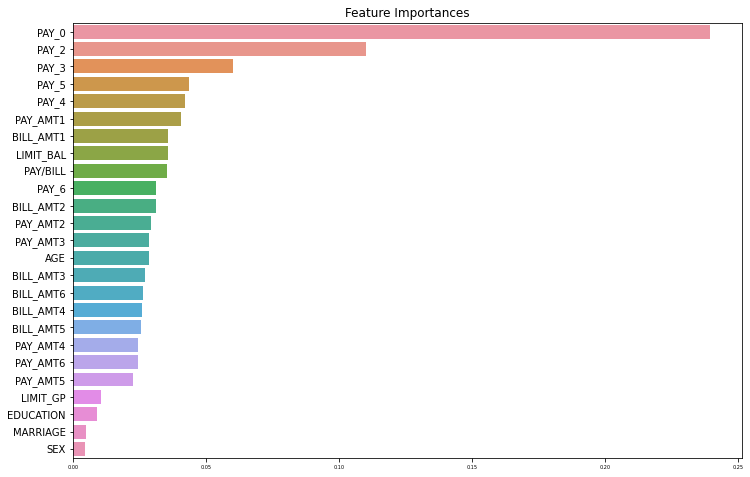

In [72]:
get_feature_importances(model=model, data=train_x)

- model save

In [ ]:
import pickle

saved_model = pickle.dumps(model)

In [ ]:
model = pickle.loads(saved_model)